In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

**make this plots interactive**

Text(0, 0.5, 'p(food = 1)')

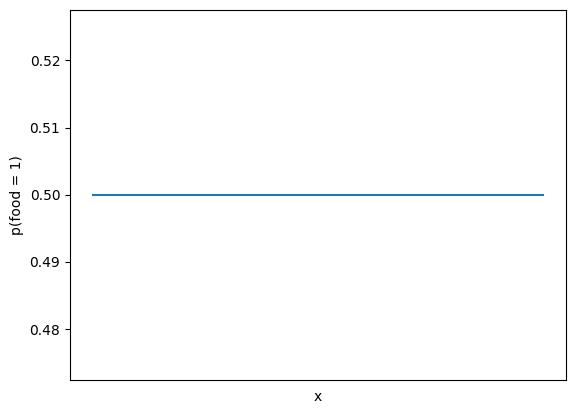

In [2]:
def logistic(x, b0=0, b1=1):
    return 1 / (1 + np.exp(-(b0 + b1*x)))

x = np.linspace(-10, 10, 100)
y = logistic(x, b0=0, b1=0)

plt.plot(x, y)
plt.xticks([])
plt.xlabel('x')
plt.ylabel('p(food = 1)')

In [12]:
np.random.seed(2)
n = 20
X1 = np.random.randint(1, 7, n)
X2 = np.random.randint(1, 7, n)
Y = []

# print(X1)
# print(X2)

for i, (x1, x2) in enumerate(zip(X1, X2)):
    y = 0
    if ((x1 < 4) and (x2 < 4)) or ((x1 >= 4) and (x2 >= 4)):
        y = 1
    Y.append(y)
Y = np.array(Y)
# print(Y)

exog = sm.add_constant(np.stack([X1, X2, X1*X2], axis=1))
endog = Y.reshape([-1, 1]).astype(float)

logit_mod = sm.Logit(endog, exog)
logit_res = logit_mod.fit()

display(logit_res.summary())

         Current function value: 0.000000
         Iterations: 35


/opt/miniconda3/envs/stats/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                   1.000
Time:                        13:44:09   Log-Likelihood:            -1.8958e-06
converged:                      False   LL-Null:                       -137.99
Covariance Type:            nonrobust   LLR p-value:                 1.571e-59
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        811.4630   3.56e+04      0.023      0.982   -6.89e+04    7.06e+04
x1          -232.2362   1.03e+04     -0.023      0.982   -2.03e+04    1.99e+04
x2          -232.2362   1.03e+04     -0.023      0.982   -2.03e+04    1.99e+04
x3            66.4512   2956.688      0.022      0.982   -5728.552    5861.454
==============================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""